# Basic usage

The `nested_grid_plotter` library provides an easy way to create highly customizable plotters with complex grid layout in a very simple way. It is based on `matplotlib` and uses a system of `subfigures` and `subplots`.

This tutorial requires the basics of [matplotlib](https://matplotlib.org/).

Everything doable with matplotlib is doable with this plotter.

Note that the purpose of this library is simply to simplify some operations and to avoid code duplication. All the figures can be produced without this library, with matplotlib alone.

Let's start by importing the modules that we need.

In [1]:
import nested_grid_plotter
from IPython.display import Image
from nested_grid_plotter import NestedGridPlotter
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import copy
from pathlib import Path
import tempfile  # to save temporary images

Check the versions being used:

In [2]:
print(f"matplotlib version = {mpl.__version__}")
print(f"nested_grid_plotter version = {nested_grid_plotter.__version__}")
print(f"numpy version = {np.__version__}")

matplotlib version = 3.8.3
nested_grid_plotter version = 1.0.1
numpy version = 1.25.2


To display the figure inline in this jupyter notebook, let's run:

In [3]:
%matplotlib inline

Let's also apply some basic parameters for our figure so it looks nice.

In [4]:
new_rc_params = {
    "font.size": 16,
    "figure.figsize": (8, 8),
    "figure.facecolor": "w",
    "savefig.facecolor": "w",
    "savefig.edgecolor": "k",
    "savefig.dpi": 300,
}
plt.rcParams.update(new_rc_params)

Let's define a utility to print dictionaries nicely:

In [5]:
import json


def dict_pretty_print(my_name, my_dict):
    """Pretty print the input dict."""
    kwjson = {"indent": 4, "sort_keys": True, "default": str}
    print(f"{my_name} = ", json.dumps(my_dict, **kwjson))

The creation of a plotter requires only three optional arguments. 

* Parameters: 
    - **fig_params: Dict[str, Any]** : Parameters for `matplotlib.pyplot.figure`.
    - **subfigs_params: Dict[str, Any]** : Parameters for `matplotlib.figure.Figure.subfigures`.
    - **subplots_mosaic_params: Dict[str, Any]** : Parameters for the subplots in the subfigures. See subplot_mosaic.

TIPS: You can also have a look at the initializer documentation if you don't remember (`help(NestedGridPlotter.__init__)`).

Let's now create a versy simple plot, without passing any arguments to the plotter:

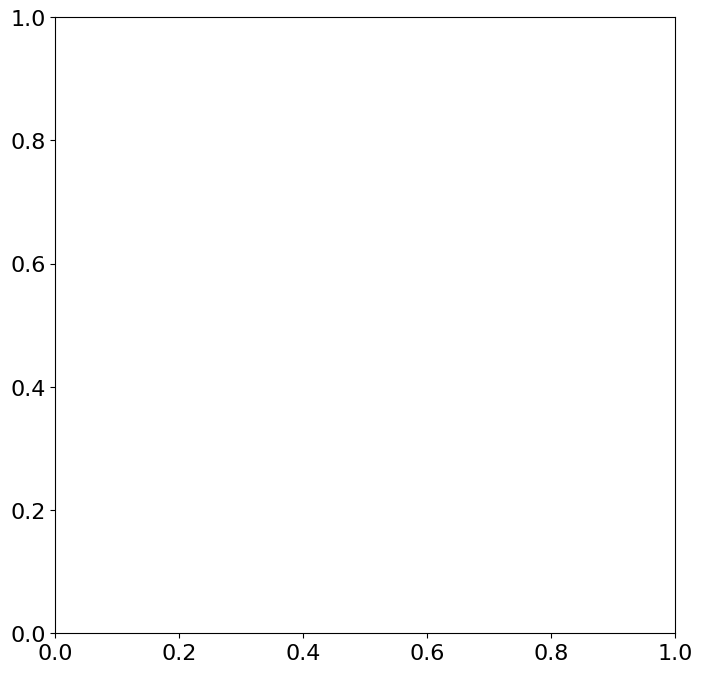

In [6]:
plotter = NestedGridPlotter()

The created plotter has three attributes that the user can use to poppulate the plot:
- `plotter.fig`
- `plotter.subfigs`
- `plotter.grouped_ax_dict`
- `plotter.ax_dict`

Note that by default, the subfigure is name "fig11" and the axis "ax11".

In [7]:
dict_pretty_print("plotter.fig", plotter.fig)
dict_pretty_print("plotter.subfigs", plotter.subfigs)
dict_pretty_print("plotter.grouped_ax_dict", plotter.grouped_ax_dict)
dict_pretty_print("plotter.ax_dict", plotter.ax_dict)

plotter.fig =  "Figure(800x800)"
plotter.subfigs =  {
    "fig1-1": "<matplotlib.figure.SubFigure object at 0x7b3395340450>"
}
plotter.grouped_ax_dict =  {
    "fig1-1": {
        "ax1-1": "Axes(0.125,0.11;0.775x0.77)"
    }
}
plotter.ax_dict =  {
    "ax1-1": "Axes(0.125,0.11;0.775x0.77)"
}


To plot some random data, simply use the classic `matplotlib` interface. Remember we just use a wrapper.

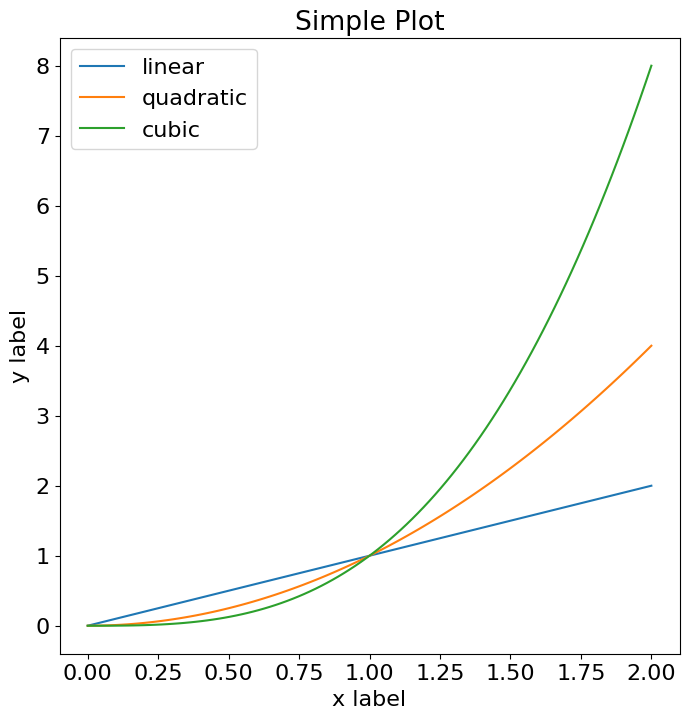

In [8]:
x = np.linspace(0, 2, 100)  # Sample data.
ax = plotter.ax_dict["ax1-1"]
ax.plot(x, x, label="linear")
ax.plot(x, x**2, label="quadratic")
ax.plot(x, x**3, label="cubic")
ax.set_xlabel("x label")  # Add an x-label to the axes.
ax.set_ylabel("y label")  # Add a y-label to the axes.
ax.set_title("Simple Plot")  # Add a title to the axes.
ax.legend()
# Add a legend.
plotter.fig

## Creating nested plots

This is where the plotter wrapper starts to be useful. We now want to create a 2x3 figure:

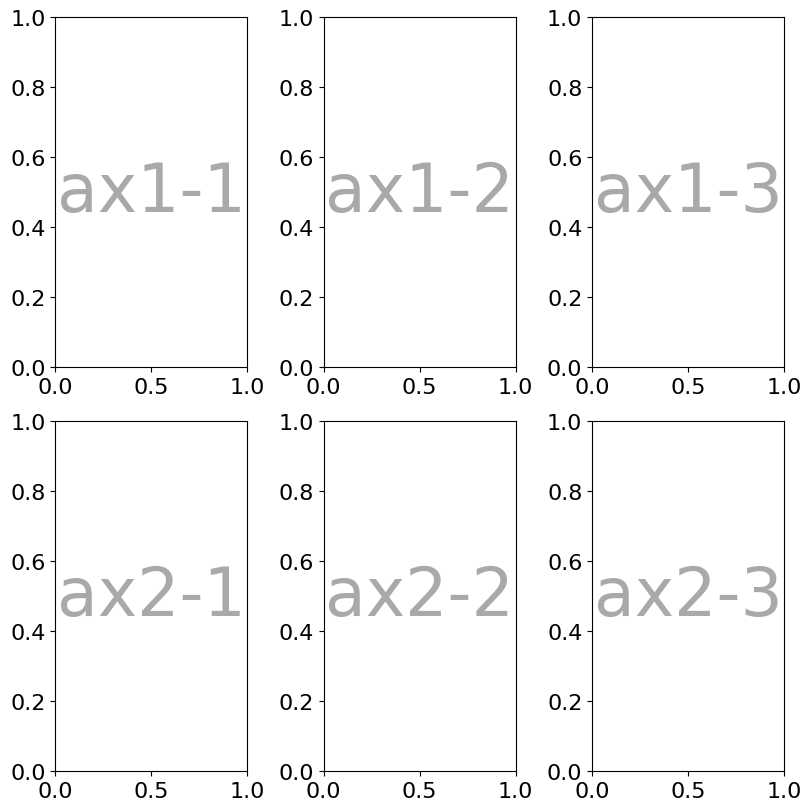

In [9]:
plotter = NestedGridPlotter(
    fig_params={"constrained_layout": True},  # Always use this to prevent overlappings
    subfigs_params={"nrows": 2, "ncols": 3},
)
plotter.identify_axes()  # Helper to add the name of the axis on the plot

However note that it results in the creation of 6 subfigures. Figures are named `"fig{i}{j}"` and axes `"ax{i}{j}"`, where `i` and `j` are the row and column numbers respectively.

In [10]:
dict_pretty_print("plotter.fig", plotter.fig)
dict_pretty_print("plotter.subfigs", plotter.subfigs)
dict_pretty_print("plotter.grouped_ax_dict", plotter.grouped_ax_dict)
dict_pretty_print("plotter.ax_dict", plotter.ax_dict)

plotter.fig =  "Figure(800x800)"
plotter.subfigs =  {
    "fig1-1": "<matplotlib.figure.SubFigure object at 0x7b3392ac7d10>",
    "fig1-2": "<matplotlib.figure.SubFigure object at 0x7b3392ae3910>",
    "fig1-3": "<matplotlib.figure.SubFigure object at 0x7b3395250590>",
    "fig2-1": "<matplotlib.figure.SubFigure object at 0x7b3392a9f090>",
    "fig2-2": "<matplotlib.figure.SubFigure object at 0x7b3392aee550>",
    "fig2-3": "<matplotlib.figure.SubFigure object at 0x7b3392afb2d0>"
}
plotter.grouped_ax_dict =  {
    "fig1-1": {
        "ax1-1": "Axes(0.187712,0.0855788;0.729226x0.883696)"
    },
    "fig1-2": {
        "ax1-2": "Axes(0.187712,0.0855788;0.729226x0.883696)"
    },
    "fig1-3": {
        "ax1-3": "Axes(0.187712,0.0855788;0.729226x0.883696)"
    },
    "fig2-1": {
        "ax2-1": "Axes(0.187712,0.0855788;0.729226x0.883696)"
    },
    "fig2-2": {
        "ax2-2": "Axes(0.187712,0.0855788;0.729226x0.883696)"
    },
    "fig2-3": {
        "ax2-3": "Axes(0.187712,0.0855788;0

To obtain the same result but with a unique subfigure, we need to use the `subplots_mosaic_params`.

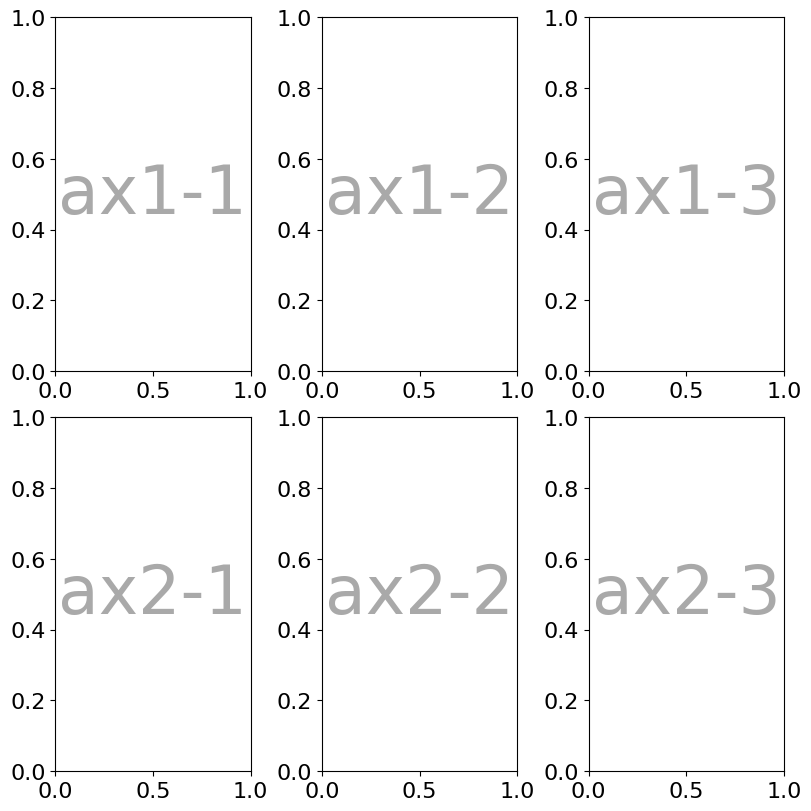

In [11]:
plotter = NestedGridPlotter(
    fig_params={"constrained_layout": True},  # Always use this to prevent overlappings
    subplots_mosaic_params={
        "my_subfigure_name": dict(
            mosaic=[["ax1-1", "ax1-2", "ax1-3"], ["ax2-1", "ax2-2", "ax2-3"]]
        ),
    },
)
plotter.identify_axes()  # Helper to add the name of the axis on the plot

In [12]:
dict_pretty_print("plotter.fig", plotter.fig)
dict_pretty_print("plotter.subfigs", plotter.subfigs)
dict_pretty_print("plotter.grouped_ax_dict", plotter.grouped_ax_dict)
dict_pretty_print("plotter.ax_dict", plotter.ax_dict)

plotter.fig =  "Figure(800x800)"
plotter.subfigs =  {
    "my_subfigure_name": "<matplotlib.figure.SubFigure object at 0x7b3392aed350>"
}
plotter.grouped_ax_dict =  {
    "my_subfigure_name": {
        "ax1-1": "Axes(0.0617365,0.542362;0.244279x0.44243)",
        "ax1-2": "Axes(0.39507,0.542362;0.244279x0.44243)",
        "ax1-3": "Axes(0.728403,0.542362;0.244279x0.44243)",
        "ax2-1": "Axes(0.0617365,0.0423615;0.244279x0.44243)",
        "ax2-2": "Axes(0.39507,0.0423615;0.244279x0.44243)",
        "ax2-3": "Axes(0.728403,0.0423615;0.244279x0.44243)"
    }
}
plotter.ax_dict =  {
    "ax1-1": "Axes(0.0617365,0.542362;0.244279x0.44243)",
    "ax1-2": "Axes(0.39507,0.542362;0.244279x0.44243)",
    "ax1-3": "Axes(0.728403,0.542362;0.244279x0.44243)",
    "ax2-1": "Axes(0.0617365,0.0423615;0.244279x0.44243)",
    "ax2-2": "Axes(0.39507,0.0423615;0.244279x0.44243)",
    "ax2-3": "Axes(0.728403,0.0423615;0.244279x0.44243)"
}


We can now combine the two and customize the subfigures independenlty. `subplots_mosaic_params` is a dictionary that takes subfigure names as keys and dict arguments for `matplotlib.figure.Figure.subplot_mosaic` with an extra keyword `mosaic` to indicate the first positional argument expected by `matplotlib.figure.Figure.subplot_mosaic`.

In this case, we decided both of how figures and axes are named. For convenience in the following example, we use *l = left, r = right, b = bottom ...*.

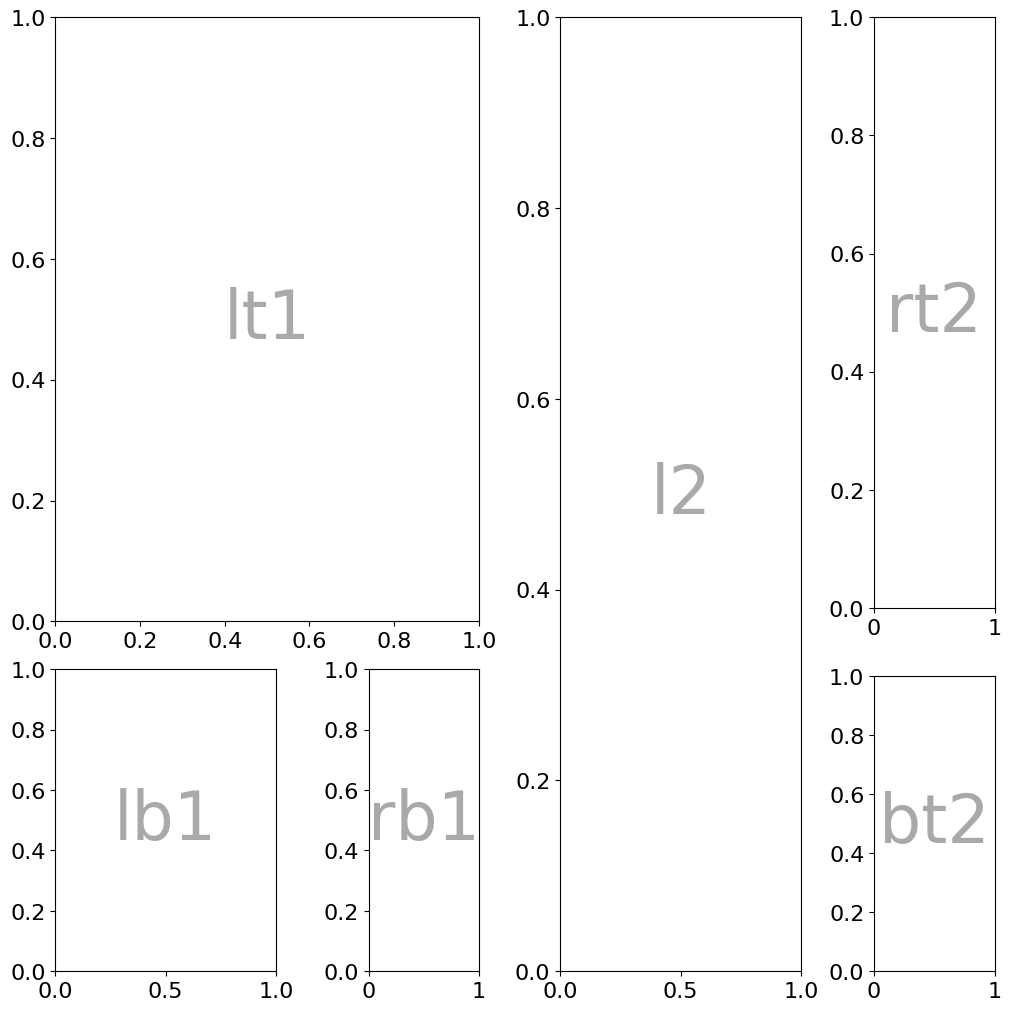

In [13]:
plotter = NestedGridPlotter(
    fig_params={
        "constrained_layout": True,  # Always use this to prevent overlappings
        "figsize": (10, 10),
    },
    subfigs_params={"nrows": 1, "ncols": 2},
    subplots_mosaic_params={
        "the_left_sub_figure": dict(
            mosaic=[["lt1", "lt1"], ["lb1", "rb1"]],
            gridspec_kw=dict(height_ratios=[2, 1], width_ratios=[2, 1]),
            sharey=False,
        ),
        "the_right_sub_figure": dict(
            mosaic=[["l2", "rt2"], ["l2", "bt2"]],
            gridspec_kw=dict(height_ratios=[2, 1], width_ratios=[2, 1]),
            sharey=False,
        ),
    },
)
plotter.identify_axes()  # Helper to add the name of the axis on the plot

We now have two subfigures each having 3 subplots:

In [14]:
dict_pretty_print("plotter.fig", plotter.fig)
dict_pretty_print("plotter.subfigs", plotter.subfigs)
dict_pretty_print("plotter.grouped_ax_dict", plotter.grouped_ax_dict)
dict_pretty_print("plotter.ax_dict", plotter.ax_dict)

plotter.fig =  "Figure(1000x1000)"
plotter.subfigs =  {
    "the_left_sub_figure": "<matplotlib.figure.SubFigure object at 0x7b33927295d0>",
    "the_right_sub_figure": "<matplotlib.figure.SubFigure object at 0x7b3392718710>"
}
plotter.grouped_ax_dict =  {
    "the_left_sub_figure": {
        "lb1": "Axes(0.0997762,0.0338892;0.445585x0.302074)",
        "lt1": "Axes(0.0997762,0.383685;0.856073x0.604148)",
        "rb1": "Axes(0.733057,0.0338892;0.222792x0.302074)"
    },
    "the_right_sub_figure": {
        "bt2": "Axes(0.733899,0.0338892;0.243415x0.295407)",
        "l2": "Axes(0.0997762,0.0338892;0.48683x0.953944)",
        "rt2": "Axes(0.733899,0.397019;0.243415x0.590814)"
    }
}
plotter.ax_dict =  {
    "bt2": "Axes(0.733899,0.0338892;0.243415x0.295407)",
    "l2": "Axes(0.0997762,0.0338892;0.48683x0.953944)",
    "lb1": "Axes(0.0997762,0.0338892;0.445585x0.302074)",
    "lt1": "Axes(0.0997762,0.383685;0.856073x0.604148)",
    "rb1": "Axes(0.733057,0.0338892;0.222792x0.302074)",


To access a specific axis or subfigure instance, use the built-in functions `get_axis` and `get_figure` respectively

In [15]:
# Get an axis
plotter.get_axis("bt2")

# Get a figure
plotter.get_subfigure("the_right_sub_figure")

Each subfigure can be customized independently which is very convenient. Subfigures can be accessed through the `subfigs` attribute. The figure name is the one given in `bla` or is `f"fig{i}{j}"`, i and j being the ith row and the jth column.
All `matplotlib` capabilities are preserved, this is just a simple wrapper. 

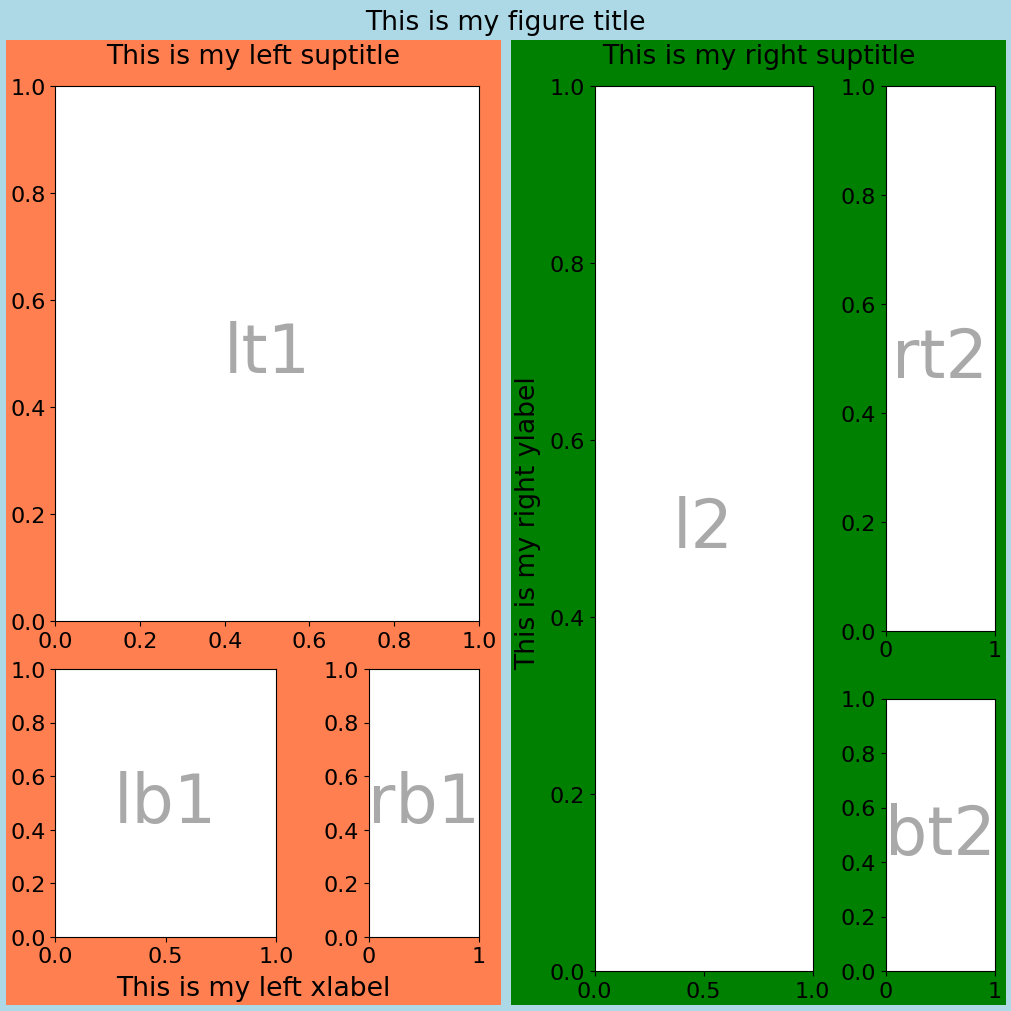

In [16]:
plotter.subfigs["the_left_sub_figure"].set_facecolor("coral")
plotter.subfigs["the_left_sub_figure"].suptitle("This is my left suptitle")
plotter.subfigs["the_left_sub_figure"].supxlabel("This is my left xlabel")

plotter.subfigs["the_right_sub_figure"].set_facecolor("g")
plotter.subfigs["the_right_sub_figure"].suptitle("This is my right suptitle")
plotter.subfigs["the_right_sub_figure"].supylabel("This is my right ylabel")

plotter.fig.set_facecolor("lightblue")
plotter.fig.suptitle("This is my figure title")
plotter.fig

## Some exceptions and limitations

It is not authorized to create plots with the same name on two different subfigures, otherwise, one or more will be missing in the `plotter.ax_dict`. An `Exception` is raised.

In [17]:
try:
    plotter = NestedGridPlotter(
        fig_params={
            "constrained_layout": True,  # Always use this to prevent overlappings
            "figsize": (10, 10),
        },
        subfigs_params={"nrows": 1, "ncols": 2},
        subplots_mosaic_params={
            "the_left_sub_figure": dict(
                mosaic=[["ax11", "ax11"], ["ax12", "ax13"]],
            ),
            "the_right_sub_figure": dict(
                mosaic=[["ax12", "ax11"], ["ax12", "ax13"]],
            ),
        },
    )
except Exception as e:  # catch the exception
    print(e)
    plt.close()  # To avoid the image display

The names ['ax11', 'ax12', 'ax13'] have been used in more than one subfigures!


Also, when `subplots_mosaic_params` is provided, the number of keys should match the number of subfigures. If the number of keys is lower that the number of subfigure, no error is thrown but some subfigures might be empty.

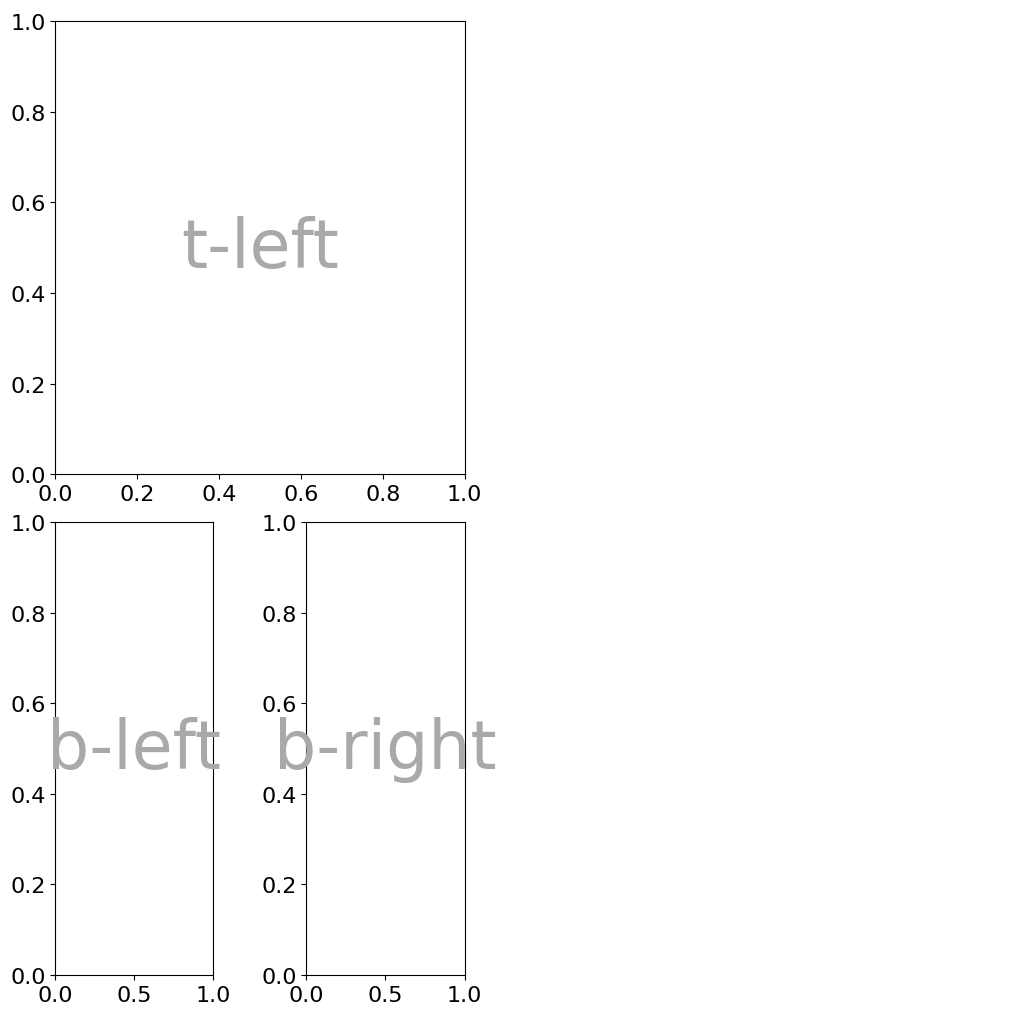

In [18]:
plotter = NestedGridPlotter(
    fig_params={
        "constrained_layout": True,  # Always use this to prevent overlappings
        "figsize": (10, 10),
    },
    subfigs_params={"nrows": 1, "ncols": 2},
    subplots_mosaic_params={
        "the_left_sub_figure": dict(
            mosaic=[["t-left", "t-left"], ["b-left", "b-right"]],
        ),
    },
)
plotter.identify_axes()

In [19]:
dict_pretty_print("plotter.fig", plotter.fig)
dict_pretty_print("plotter.subfigs", plotter.subfigs)
dict_pretty_print("plotter.grouped_ax_dict", plotter.grouped_ax_dict)
dict_pretty_print("plotter.ax_dict", plotter.ax_dict)

plotter.fig =  "Figure(1000x1000)"
plotter.subfigs =  {
    "the_left_sub_figure": "<matplotlib.figure.SubFigure object at 0x7b3392a14550>"
}
plotter.grouped_ax_dict =  {
    "the_left_sub_figure": {
        "b-left": "Axes(0.0997762,0.0338892;0.319632x0.453111)",
        "b-right": "Axes(0.607105,0.0338892;0.319632x0.453111)",
        "t-left": "Axes(0.0997762,0.534722;0.826961x0.453111)"
    }
}
plotter.ax_dict =  {
    "b-left": "Axes(0.0997762,0.0338892;0.319632x0.453111)",
    "b-right": "Axes(0.607105,0.0338892;0.319632x0.453111)",
    "t-left": "Axes(0.0997762,0.534722;0.826961x0.453111)"
}


However, is the number of keys in `subplots_mosaic_params` is superior to the number of subfigs, an error is raised.

In [20]:
try:
    plotter = NestedGridPlotter(
        fig_params={
            "constrained_layout": True,  # Always use this to prevent overlappings
            "figsize": (10, 10),
        },
        subfigs_params={"nrows": 1, "ncols": 2},
        subplots_mosaic_params={
            "the_left_sub_figure": dict(
                mosaic=[["tl1", "tl1"], ["bl1", "br1"]],
            ),
            "the_center_sub_figure": dict(
                mosaic=[["tl2", "tl2"], ["bl2", "br2"]],
            ),
            "the_right_sub_figure": dict(
                mosaic=[["tl3", "tl3"], ["bl3", "br3"]],
            ),
        },
    )
except Exception as e:
    print(e)
    plt.close()  # To avoid the image display

3 subplot configurations have been provided for subplots_mosaic_params, but there are only 2 subfigures!


For the following tutorials, let's create a general function to generate such complex plot.

In [21]:
def gen_complex_example_fig():
    return NestedGridPlotter(
        fig_params={
            "constrained_layout": True,  # Always use this to prevent overlappings
            "figsize": (15, 6),
        },
        subfigs_params={"nrows": 1, "ncols": 2},
        subplots_mosaic_params={
            "the_left_sub_figure": dict(
                mosaic=[["lt1", "lt1"], ["lb1", "rb1"]],
                gridspec_kw=dict(height_ratios=[2, 1], width_ratios=[2, 1]),
                sharey=False,
            ),
            "the_right_sub_figure": dict(
                mosaic=[["l2", "rt2"], ["l2", "bt2"]],
                gridspec_kw=dict(height_ratios=[2, 1], width_ratios=[2, 1]),
                sharey=False,
            ),
        },
    )

## Legends management

Let's add some data to our plots!

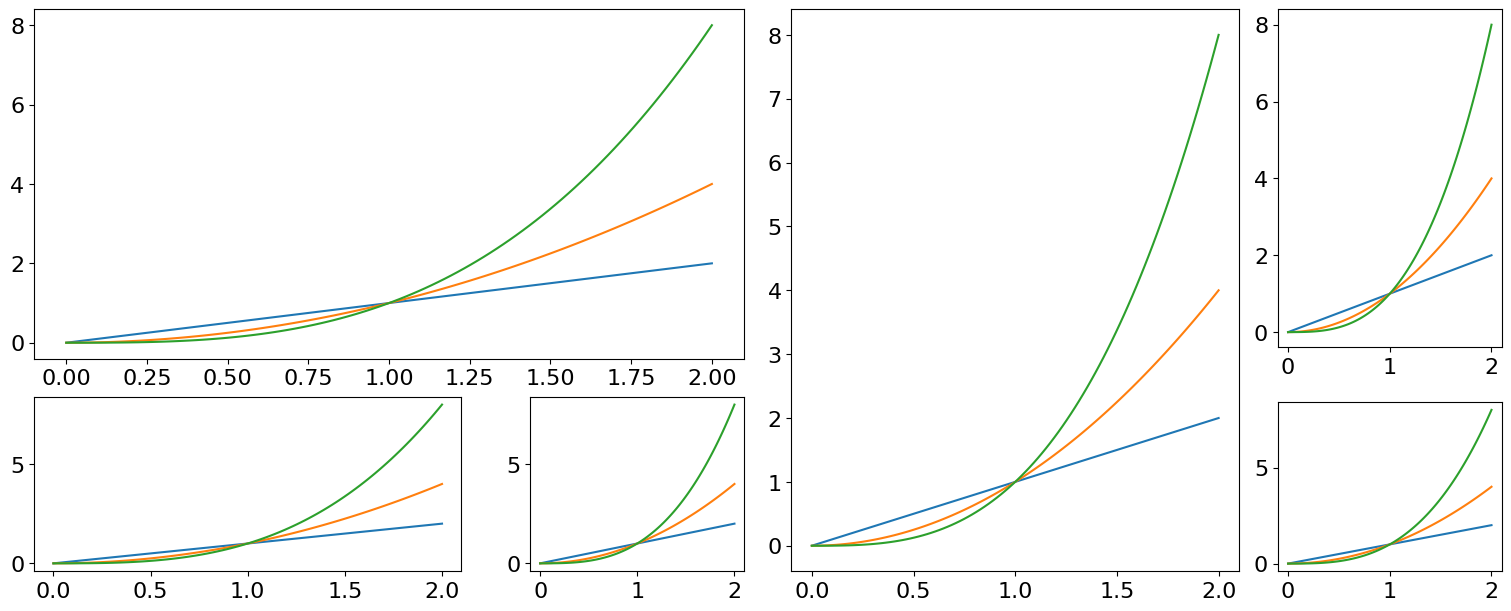

In [22]:
plotter = gen_complex_example_fig()
x = np.linspace(0, 2, 100)  # Sample data.
for ax_name, ax in plotter.ax_dict.items():
    ax.plot(x, x, label=f"linear {ax_name}")  # Plot some data on the axes.
    ax.plot(x, x**2, label=f"quadratic {ax_name}")  # Plot more data on the axes...
    ax.plot(x, x**3, label=f"cubic {ax_name}")  # ... and some more.

Add a legend to each subplots. Note that in addition to the `ax_name` all arguments to `plt.legend` are accepted.

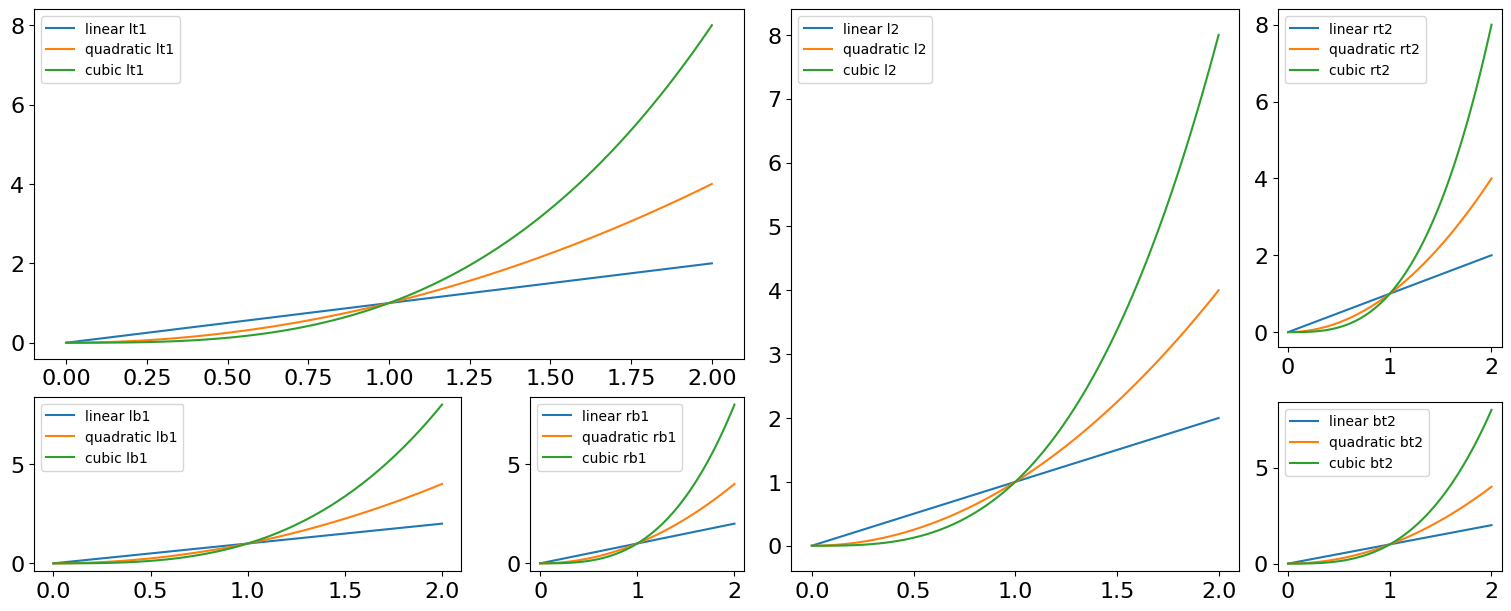

In [23]:
for ax_name in plotter.ax_dict.keys():
    plotter.add_axis_legend(ax_name, fontsize=10)
plotter.fig

However, it is sometimes convenient to gather all legends together in one "figure legend". Note that all arguments to `plt.legend` are accepted.

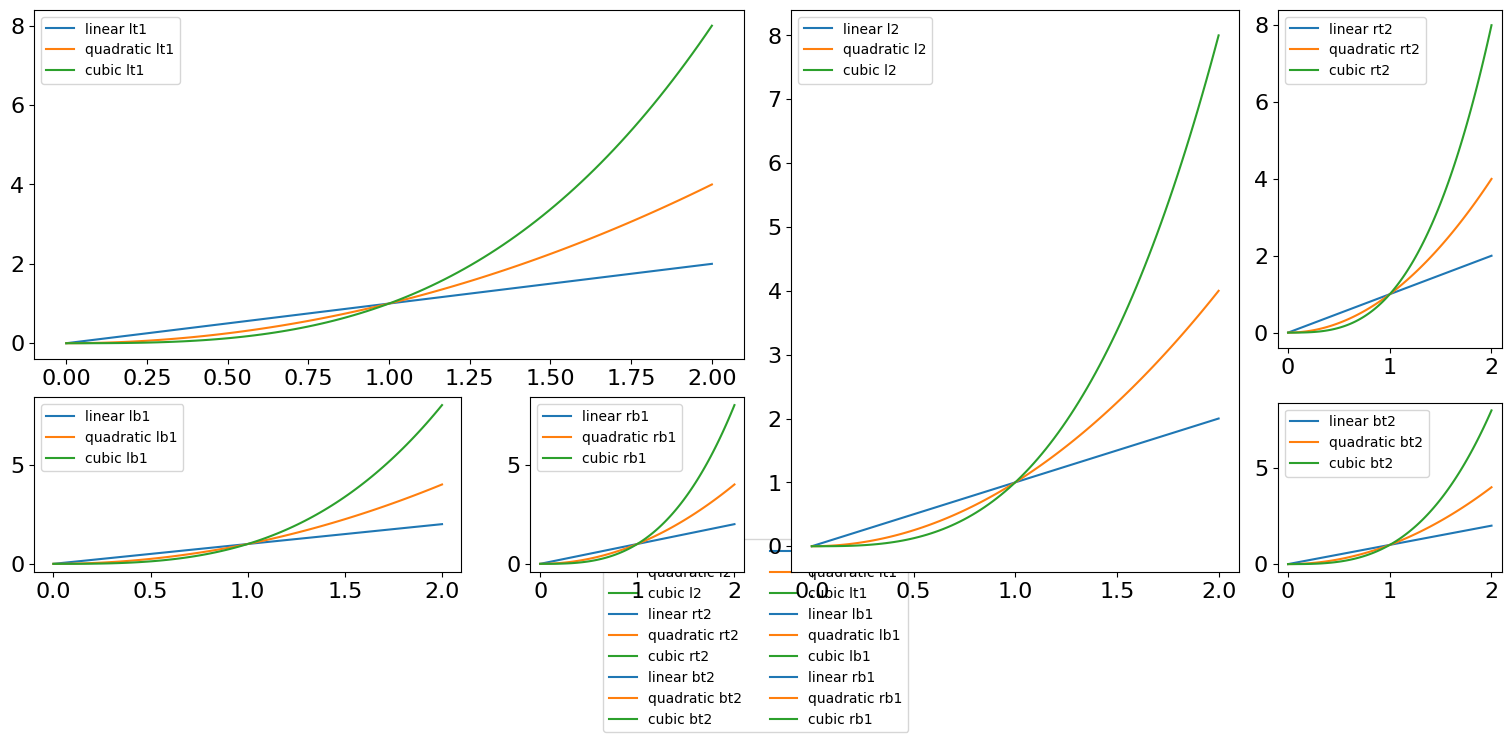

In [24]:
plotter.add_fig_legend(fontsize=10, ncol=2)
plotter.fig

The method gathers the identical labels found in the figure to avoid redundancy.

([<matplotlib.lines.Line2D at 0x7b3390c7c990>,
 ['the common linear legend item',
  'the common quadratic legend item',
  'the common cubic legend item'])

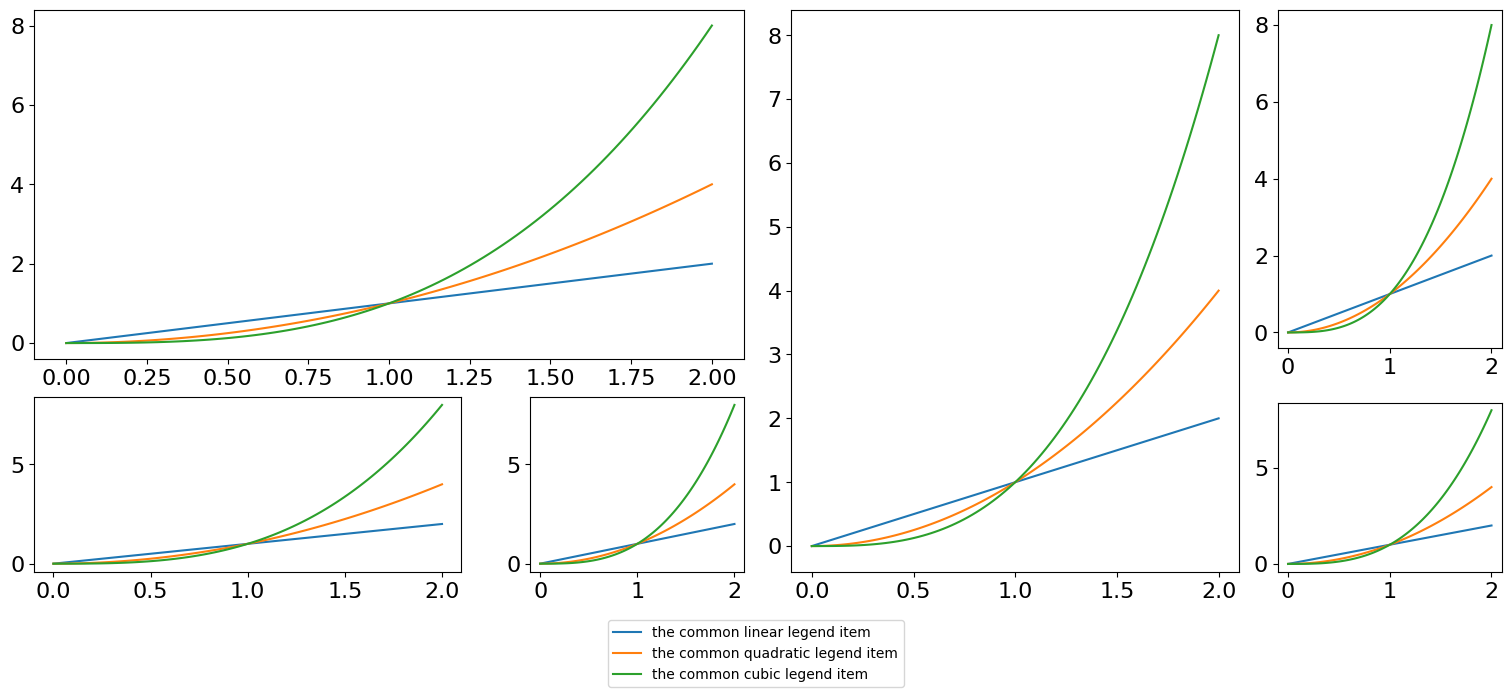

In [25]:
plotter = gen_complex_example_fig()
x = np.linspace(0, 2, 100)  # Sample data.
for ax_name, ax in plotter.ax_dict.items():
    ax.plot(x, x, label=f"the common linear legend item")  # Plot some data on the axes.
    ax.plot(
        x, x**2, label=f"the common quadratic legend item"
    )  # Plot more data on the axes...
    ax.plot(x, x**3, label=f"the common cubic legend item")  # ... and some more.

plotter.add_fig_legend(fontsize=10, bbox_y_shift=-0.03)

By default the legend is located in the bottom. It can be moved using `loc` which can take the values `left`, `right`, `top` and `bottom`. Note that it is systematically centered on the axis. However, the position can be overadjusted along the `x` and `y` axes using the keywords `bbox_x_shift` and `bbox_y_shift`. Note that the method accepts all additional `plt.legend` parameters except from `bbox_to_anchor` and `bbox_transform` which are determined automatically.

([<matplotlib.lines.Line2D at 0x7b3390ac8710>,
 ['the common linear legend item',
  'the common quadratic legend item',
  'the common cubic legend item'])

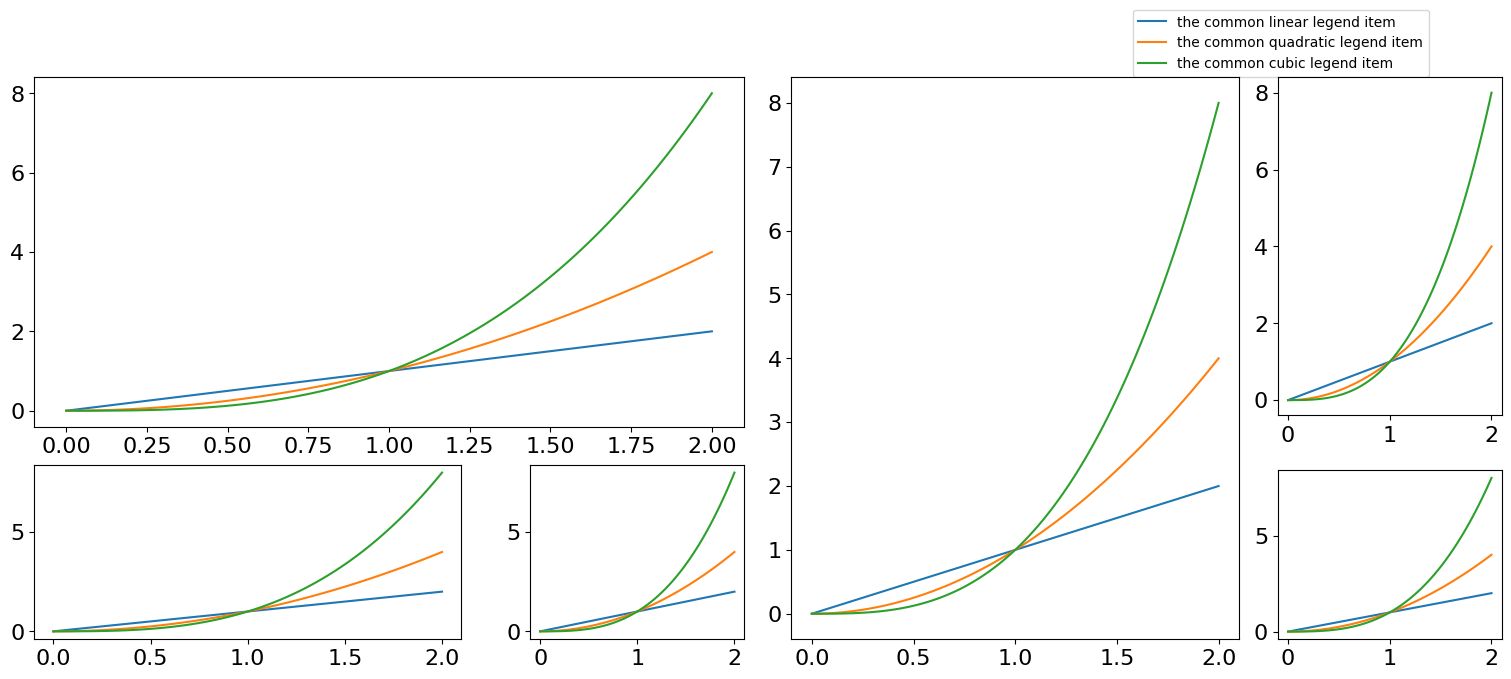

In [26]:
plotter = gen_complex_example_fig()
x = np.linspace(0, 2, 100)  # Sample data.
for ax_name, ax in plotter.ax_dict.items():
    ax.plot(x, x, label=f"the common linear legend item")  # Plot some data on the axes.
    ax.plot(
        x, x**2, label=f"the common quadratic legend item"
    )  # Plot more data on the axes...
    ax.plot(x, x**3, label=f"the common cubic legend item")  # ... and some more.


plotter.add_fig_legend(fontsize=10, loc="top", bbox_x_shift=0.35, bbox_y_shift=0.0)

Note: when using the built-in matplotlib `plotter.fig.legend()` several times, it results in x legend (stored as a list). With `plotter.add_fig_legend`, the legend list is systematically cleared and consequenlty, the figure can have only one legend at the same time.

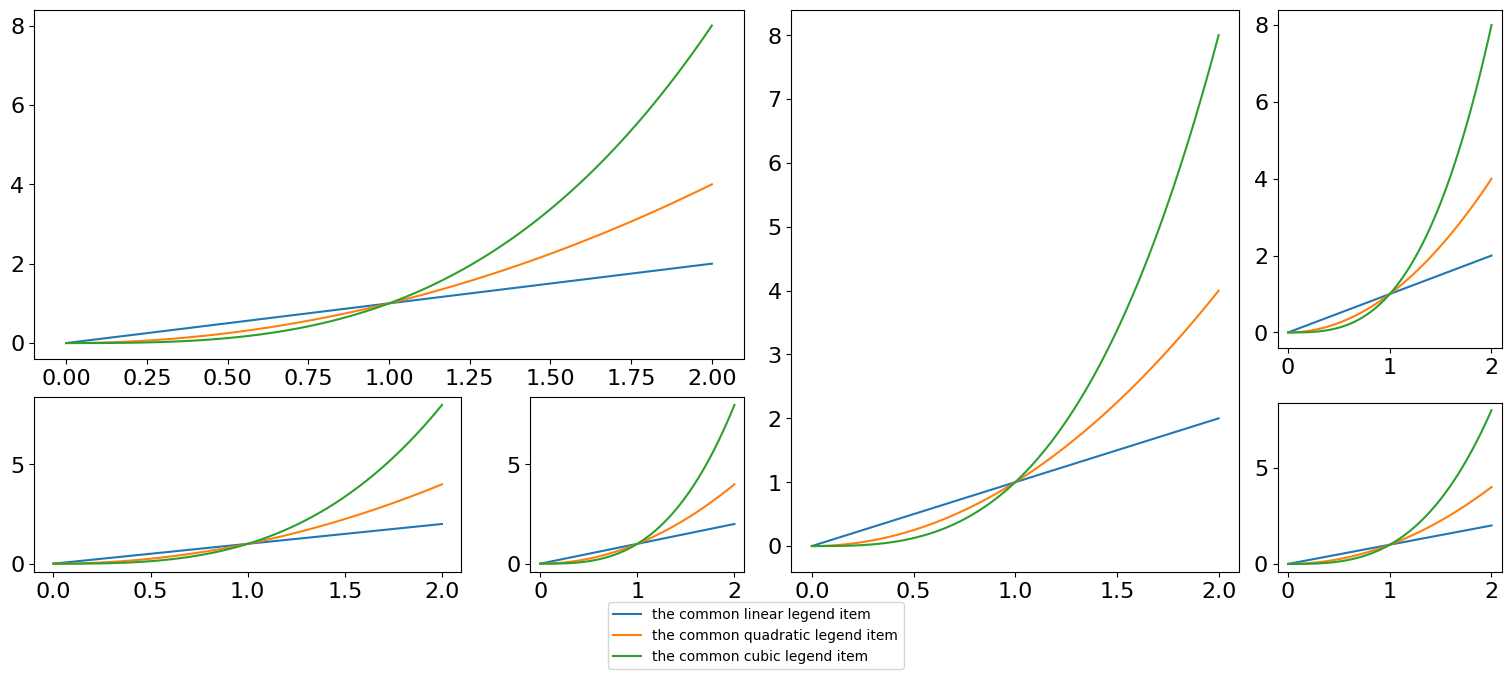

In [27]:
# Calling add_fig_legend again clear the previous legend
plotter.add_fig_legend(fontsize=10)
plotter.fig

When adding twin axes, they are automatically detected:

([<matplotlib.lines.Line2D at 0x7b3394fc5f10>,
 ['the common linear legend item',
  'the common quadratic legend item',
  'the common cubic legend item',
  'curve on a twin axis'])

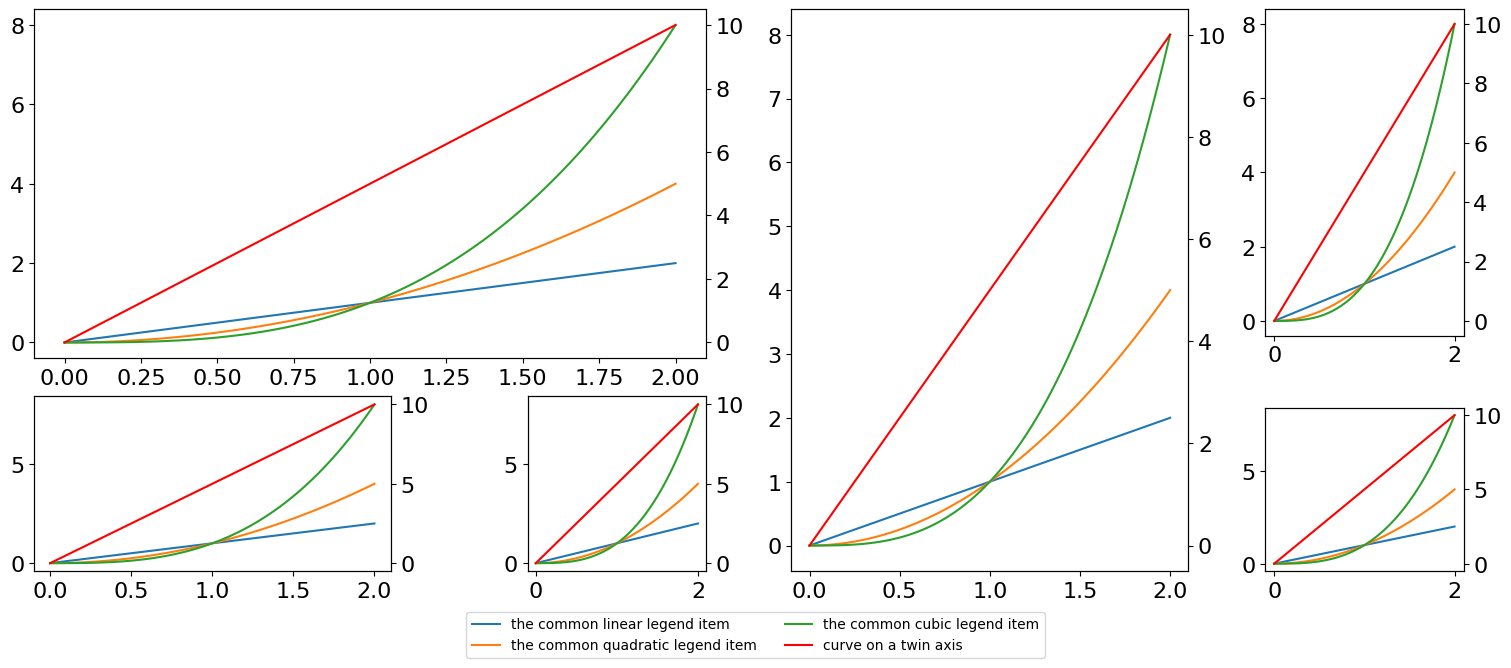

In [28]:
plotter = gen_complex_example_fig()
x = np.linspace(0, 2, 100)  # Sample data.
for ax_name, ax in plotter.ax_dict.items():
    twin_ax = ax.twinx()
    twin_ax.plot(
        x, x * 5, c="r", label=f"curve on a twin axis"
    )  # Plot some data on the axes.
    ax.plot(x, x, label=f"the common linear legend item")  # Plot some data on the axes.
    ax.plot(
        x, x**2, label=f"the common quadratic legend item"
    )  # Plot more data on the axes...
    ax.plot(x, x**3, label=f"the common cubic legend item")  # ... and some more.

plotter.add_fig_legend(fontsize=10, ncol=2, bbox_y_shift=0.0)

It is also possible to add some labels for which there is no handles or labels. This is useful when plotting hline/vlines or spans for instance.


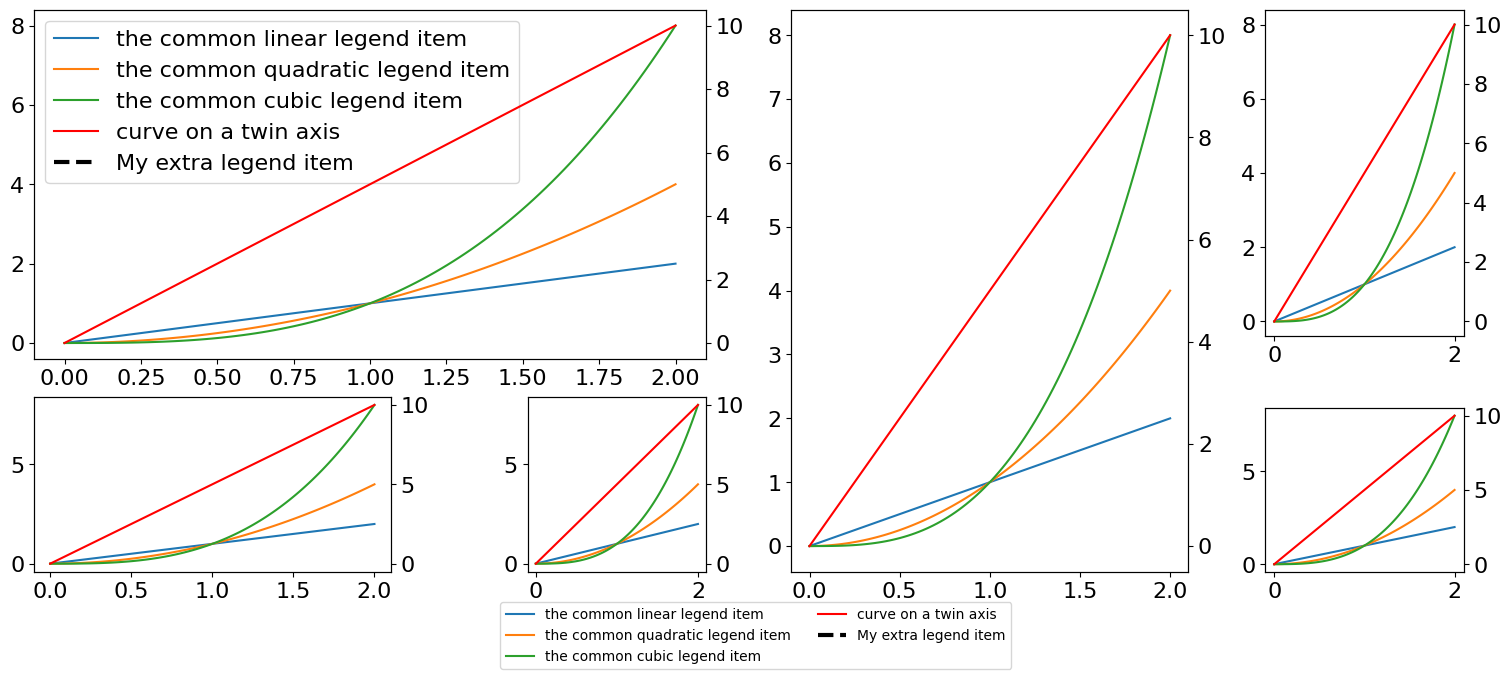

In [29]:
from matplotlib.lines import Line2D

handle = Line2D([0, 0], [0, 1], color="k", linewidth=3, linestyle="--")
plotter.add_extra_legend_item("lt1", handle, "My extra legend item")
plotter.add_axis_legend("lt1")
plotter.add_fig_legend(fontsize=10, ncol=2)
plotter.fig  # display the plot

It is possible to do the same for each subfigure with the same interface, simply by providing the subfigure `name`. Note that if the "full" figure and each subfigure can have only one legend, it is however possible to have it all at the same time (see example below), although it is not very useful.

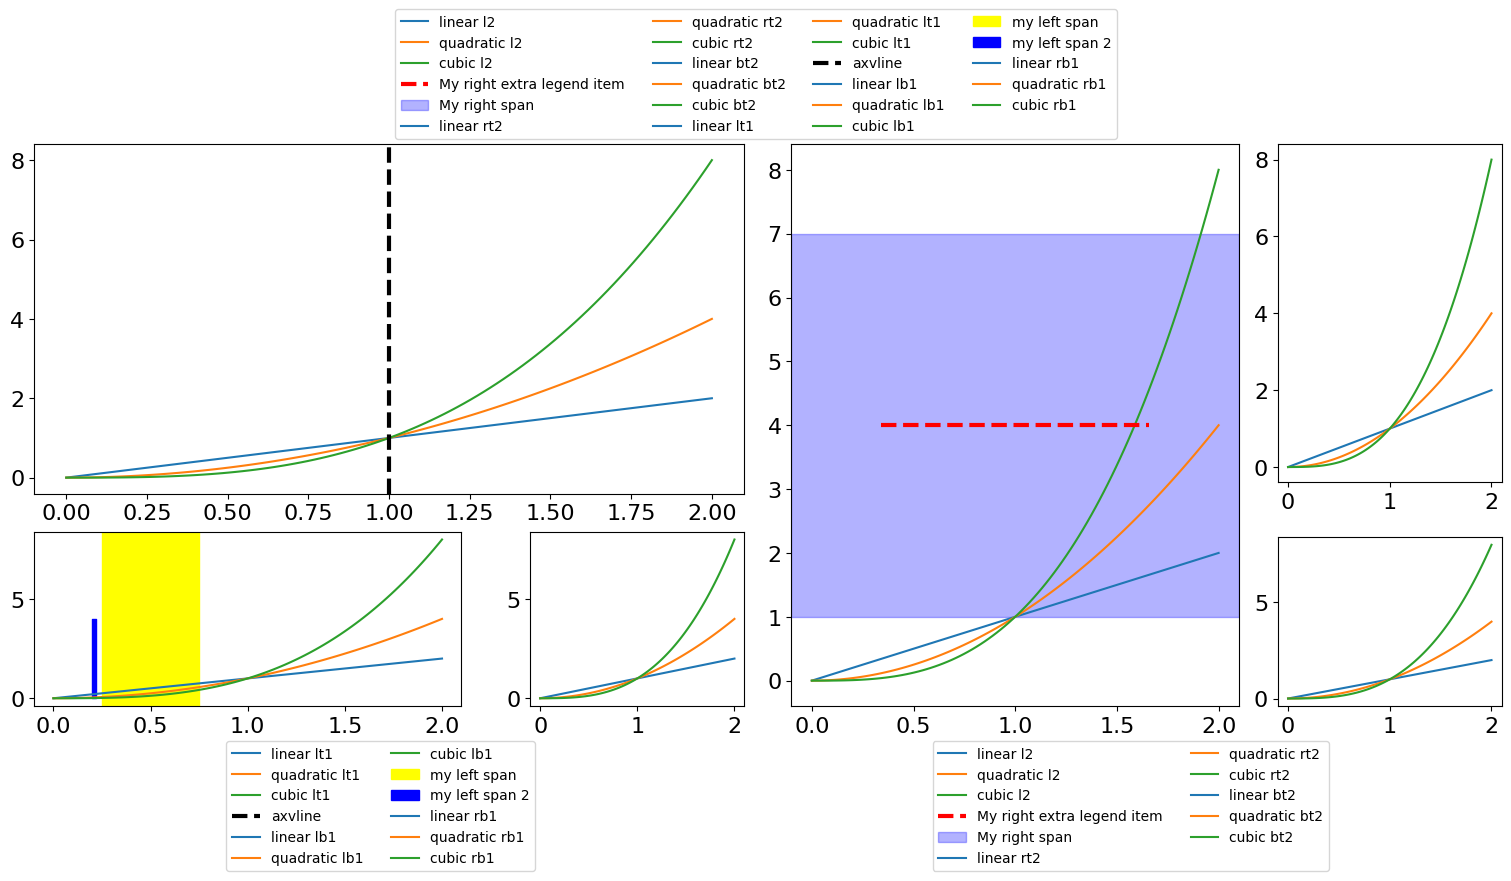

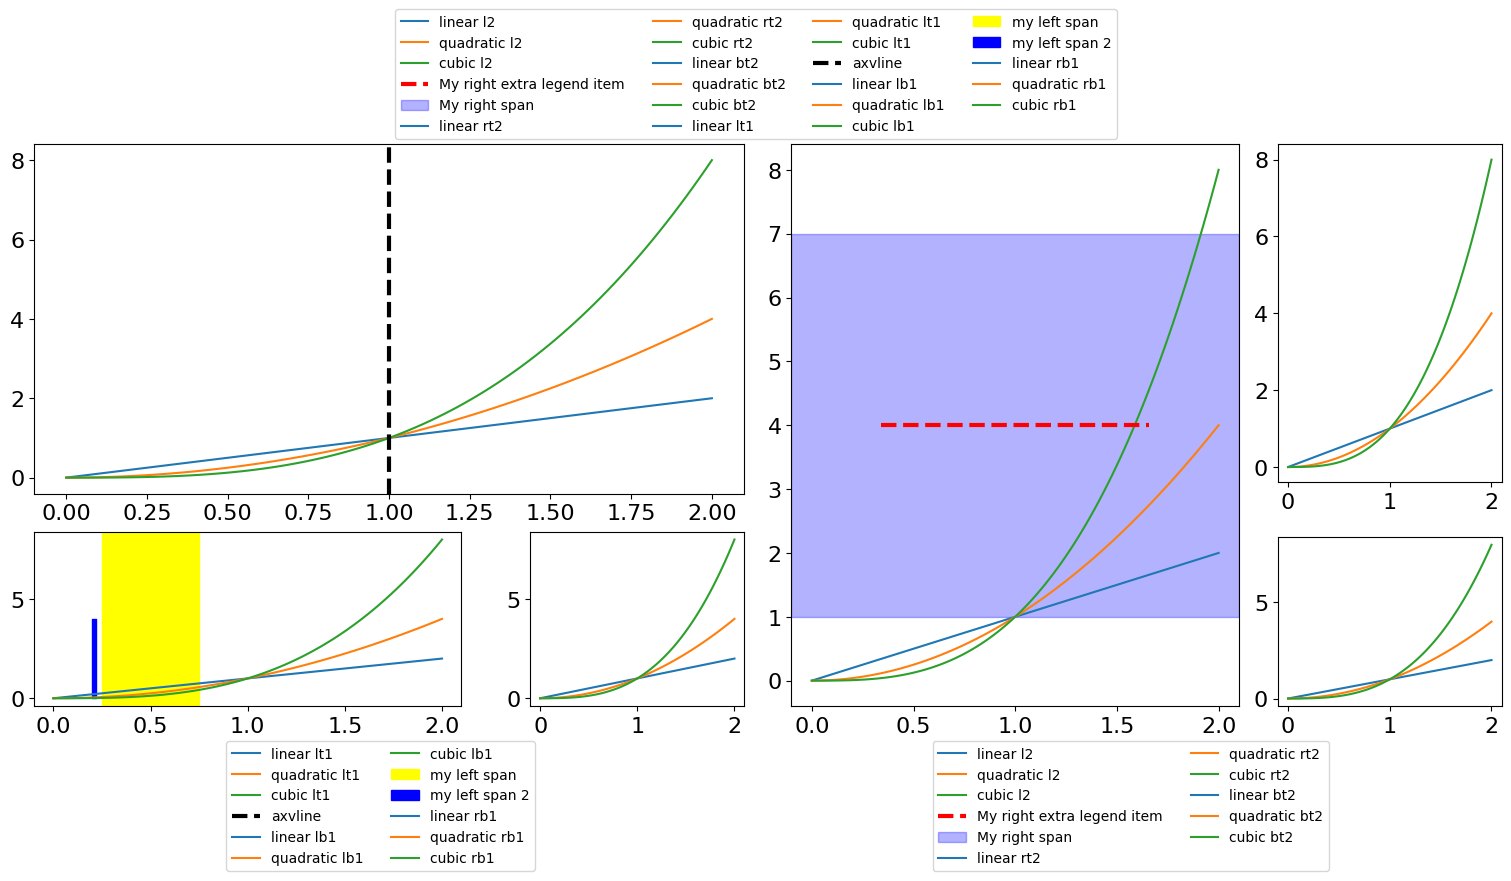

In [30]:
plotter = gen_complex_example_fig()
x = np.linspace(0, 2, 100)  # Sample data.
for ax_name, ax in plotter.ax_dict.items():
    ax.plot(x, x, label=f"linear {ax_name}")  # Plot some data on the axes.
    ax.plot(x, x**2, label=f"quadratic {ax_name}")  # Plot more data on the axes...
    ax.plot(x, x**3, label=f"cubic {ax_name}")  # ... and some more.

# Add some lines and spans and add it to the legend
handle = plotter.ax_dict["lt1"].axvline(
    x=1.0, color="k", linewidth=3, linestyle="--", label="axvline"
)

handle_v = plotter.ax_dict["lb1"].axvspan(
    xmin=0.25, xmax=0.75, color="yellow", label="my left span"
)

handle_fillbetweenx = plotter.ax_dict["lb1"].fill_betweenx(
    np.arange(5), x1=0.2, x2=0.22, color="blue", label="my left span 2"
)

handle = plotter.ax_dict["l2"].axhline(
    y=4.0, xmin=0.2, xmax=0.8, color="r", linewidth=3, linestyle="--"
)
plotter.add_extra_legend_item("l2", handle, "My right extra legend item")

handle = plotter.ax_dict["l2"].axhspan(ymin=1.0, ymax=7.0, color="blue", alpha=0.3)
plotter.add_extra_legend_item("l2", handle, "My right span")

# Add the legend to subfigures (we place it to the bottom)
plotter.add_fig_legend(
    name="the_left_sub_figure",
    fontsize=10,
    ncol=2,
    bbox_x_shift=-0.25,
    bbox_y_shift=-0.06,
)
plotter.add_fig_legend(
    name="the_right_sub_figure",
    fontsize=10,
    ncol=2,
    bbox_x_shift=+0.25,
    bbox_y_shift=-0.06,
)

# Add the "full" fig legend just for the example (we place it to the top)
plotter.add_fig_legend(fontsize=10, loc="top", ncol=4, bbox_y_shift=+0.06)

plotter.fig  # display the plot

In [31]:
plotter.subfigs.keys()

dict_keys(['the_left_sub_figure', 'the_right_sub_figure'])

## Saving with figure legends

A known issue is that the figure legend is not taken into account when scaling the figure box and the legends are cutoff. 
- For example, saving the last plotter using the basic matplotlib interface yields

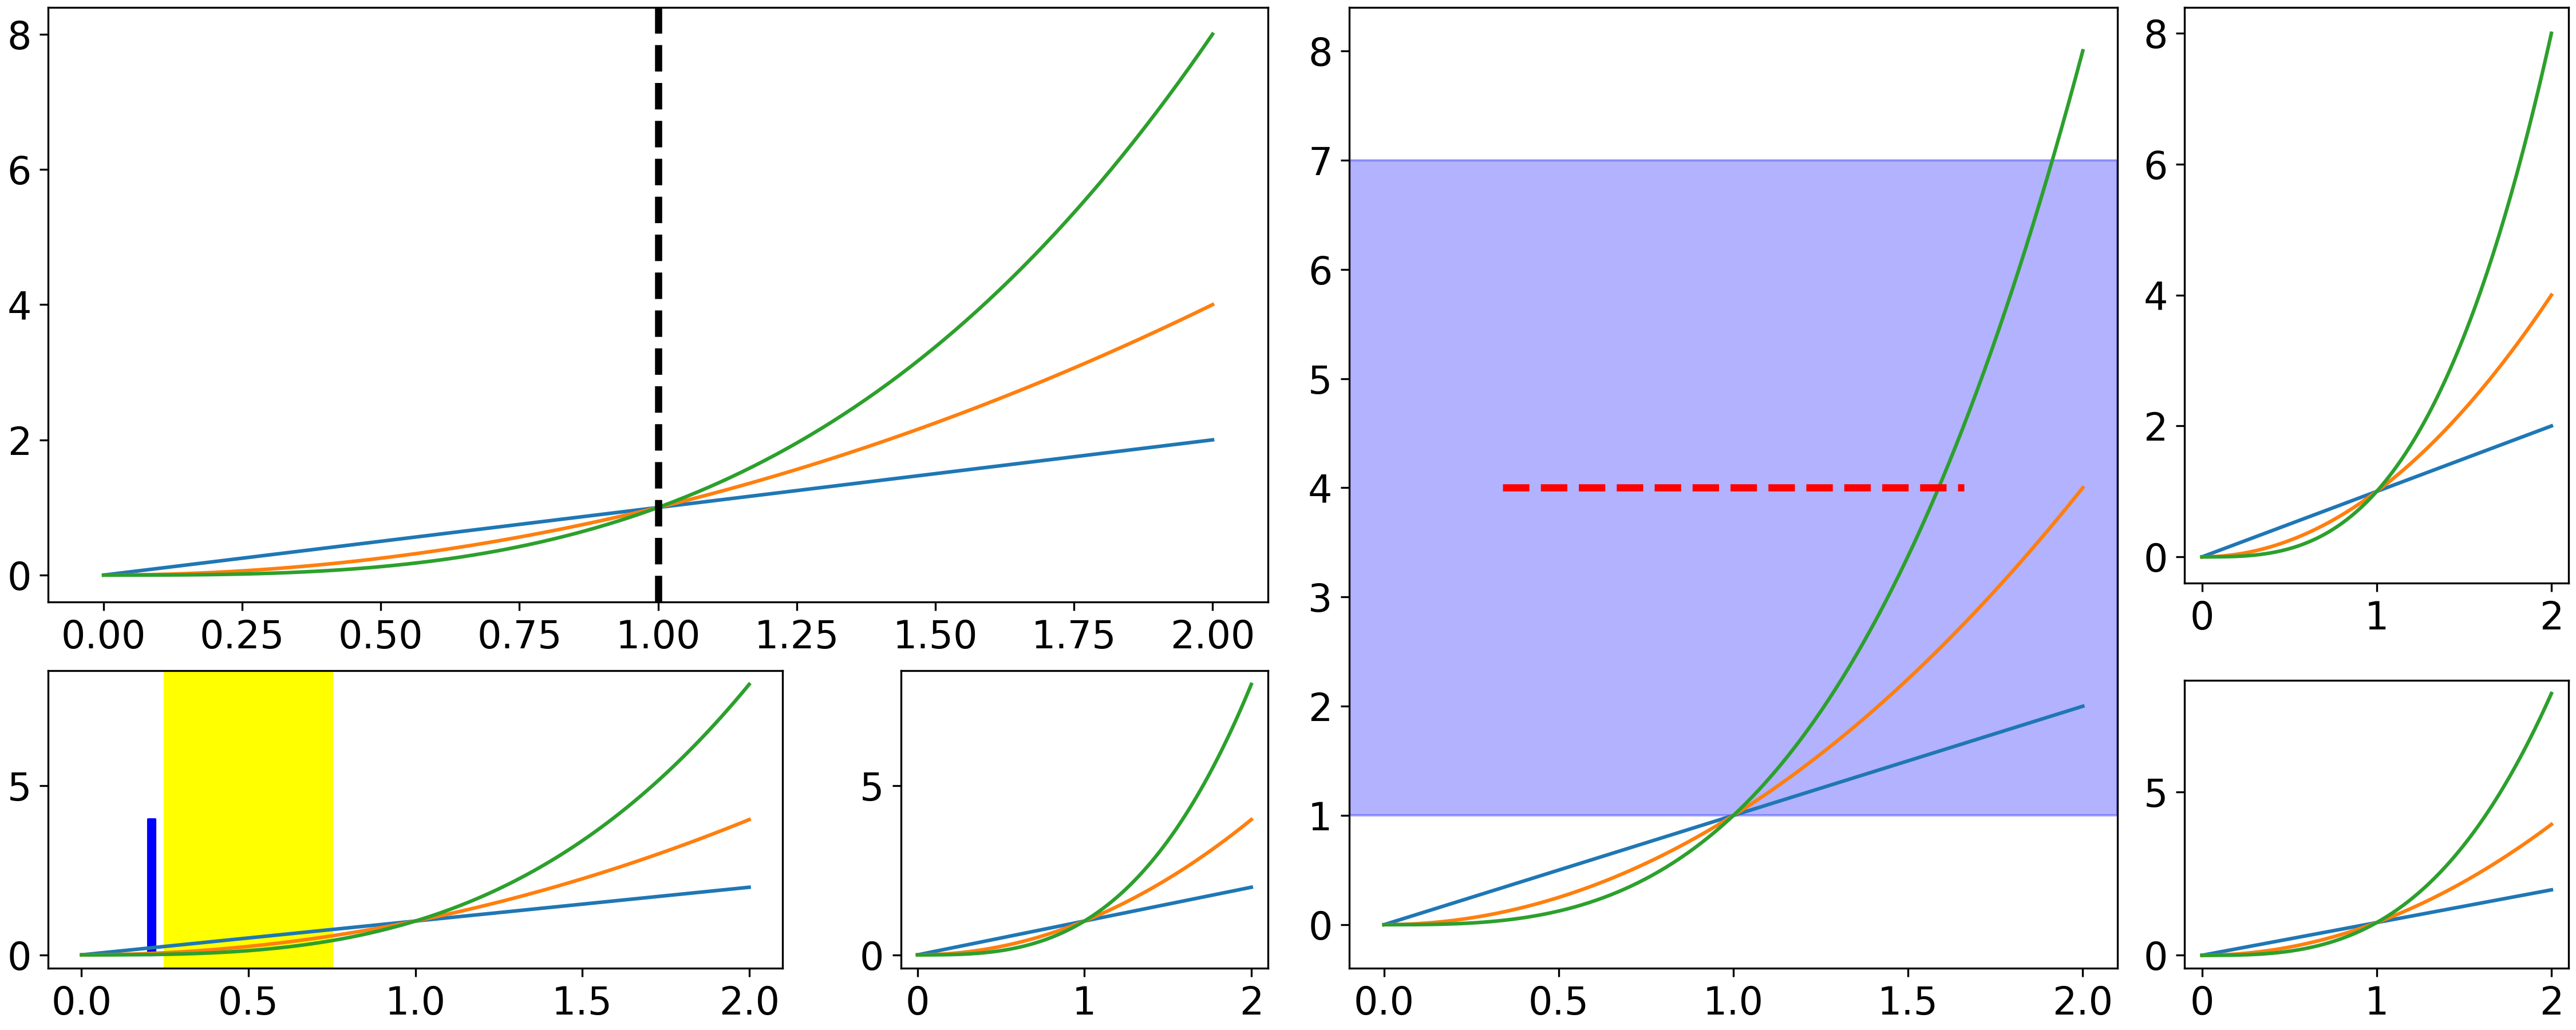

In [32]:
# create a temporary directory
tmpdir = tempfile.TemporaryDirectory()
# saving in the temp dir
save_path = Path(tmpdir.name).joinpath("tmp.png")
plotter.fig.savefig(save_path)
# showing the image
Image(save_path)

- Fortunately, nested_grid_plotter provides a solution. Warning: this works only if the `.add_fig_legend` interface has been used.

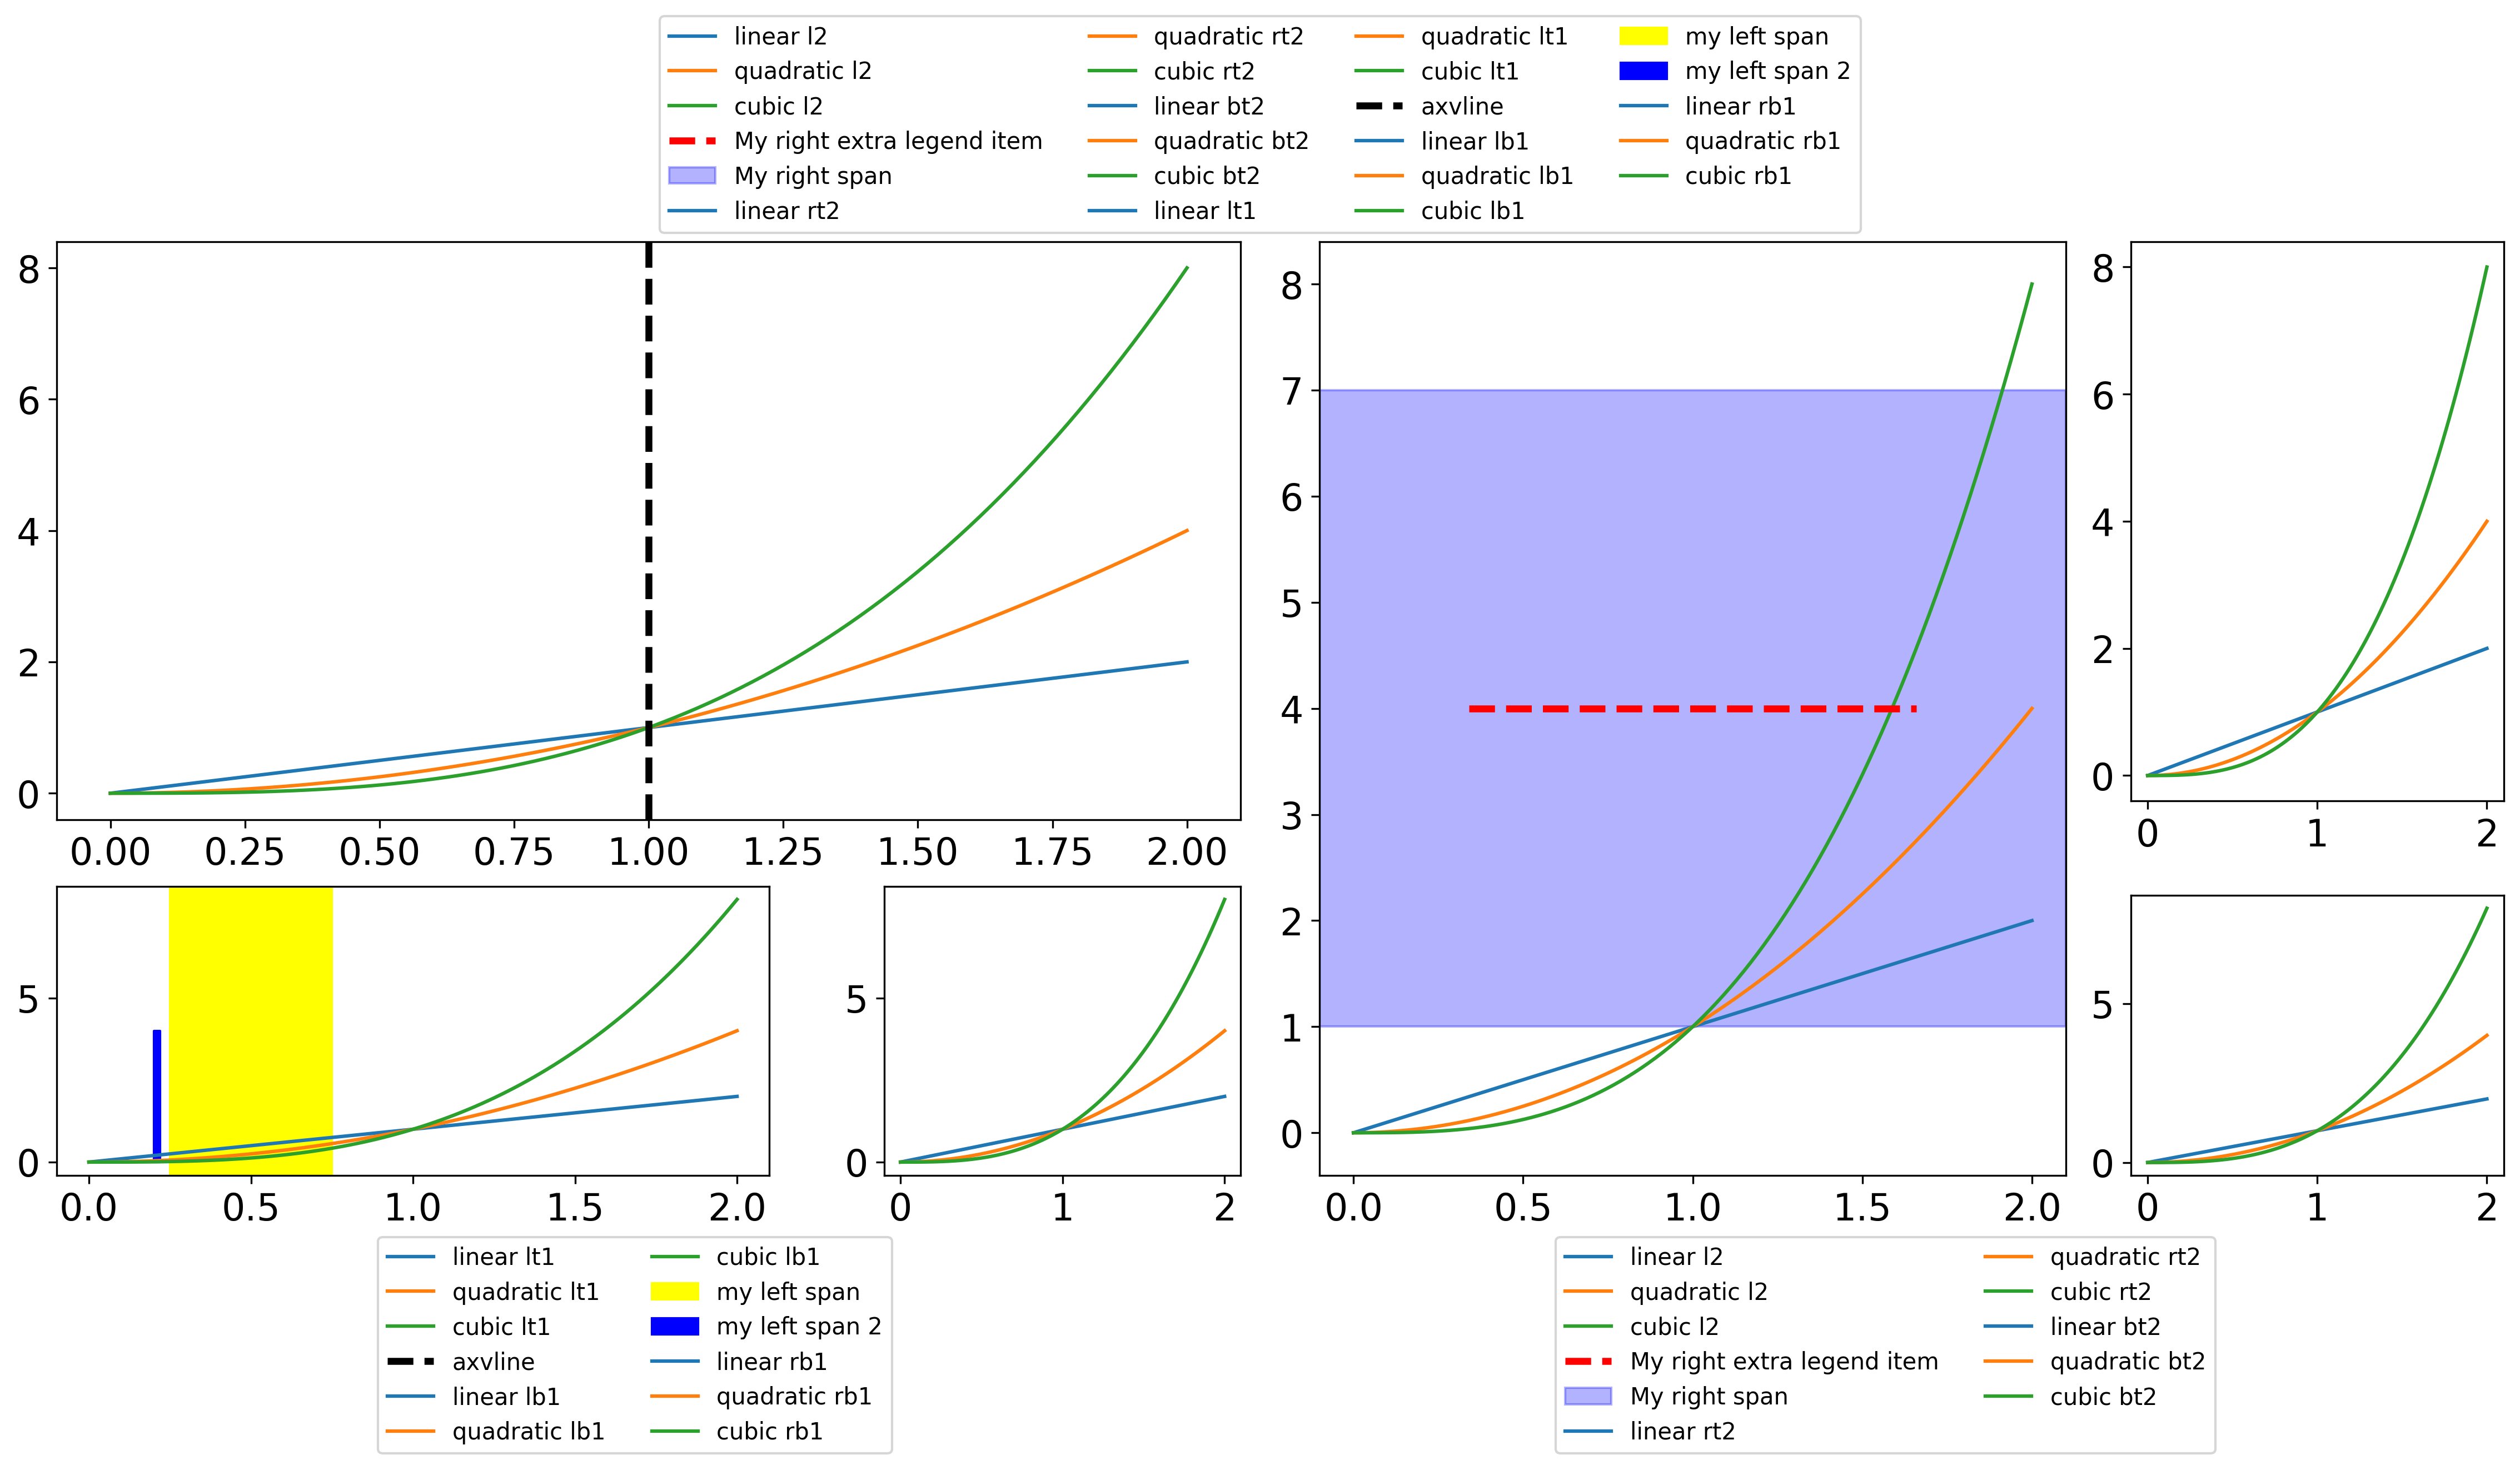

In [33]:
save_path = Path(tmpdir.name).joinpath("tmp_correct.png")
plotter.savefig(save_path)
# showing the image
Image(save_path)

## Clear axes and legends

It is possible to clear axes, legends and extra legend items with a single command. This becomes very useful when a plotter is used in series with different data.

- To clear a specific fig legend

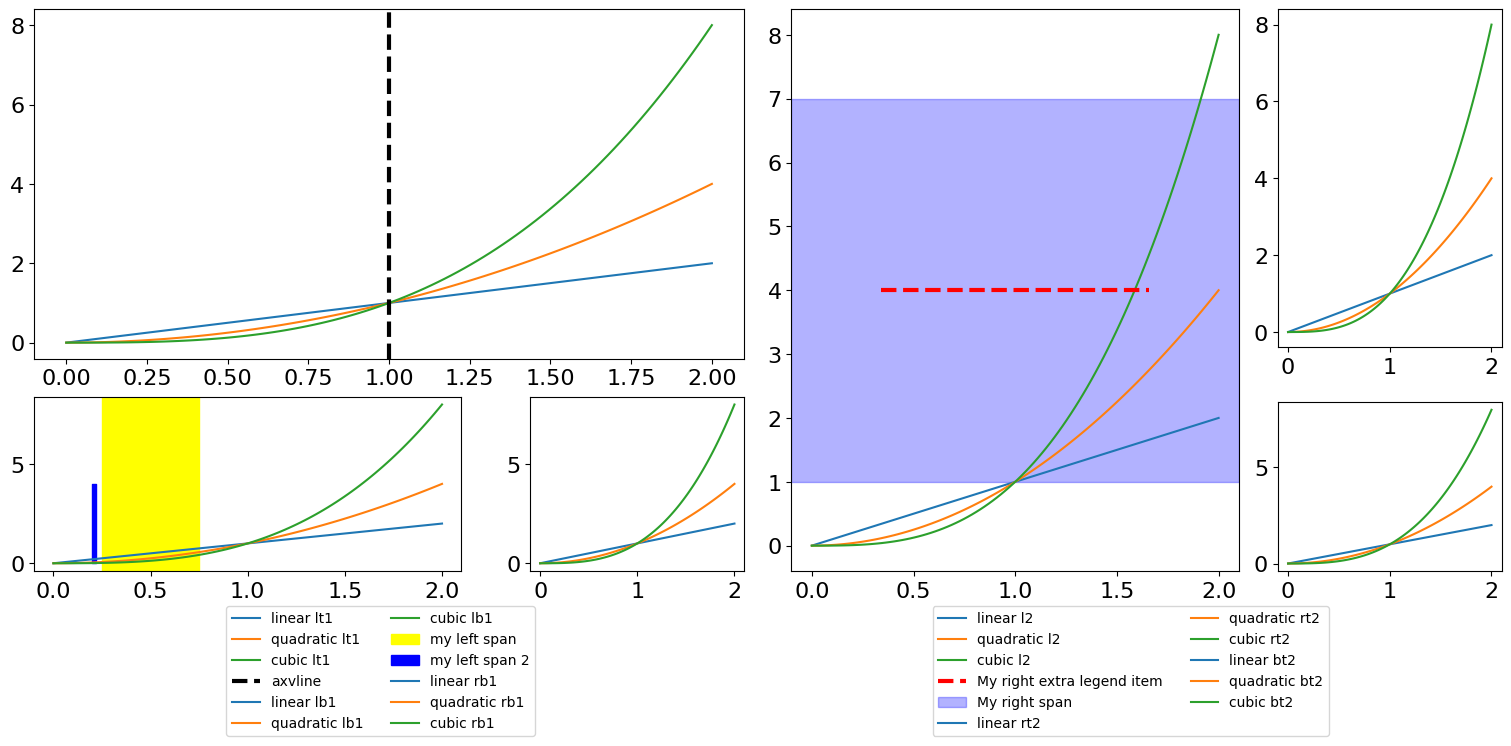

In [34]:
plotter2 = copy.deepcopy(plotter)
plotter2.fig.legends.clear()
plotter2.fig

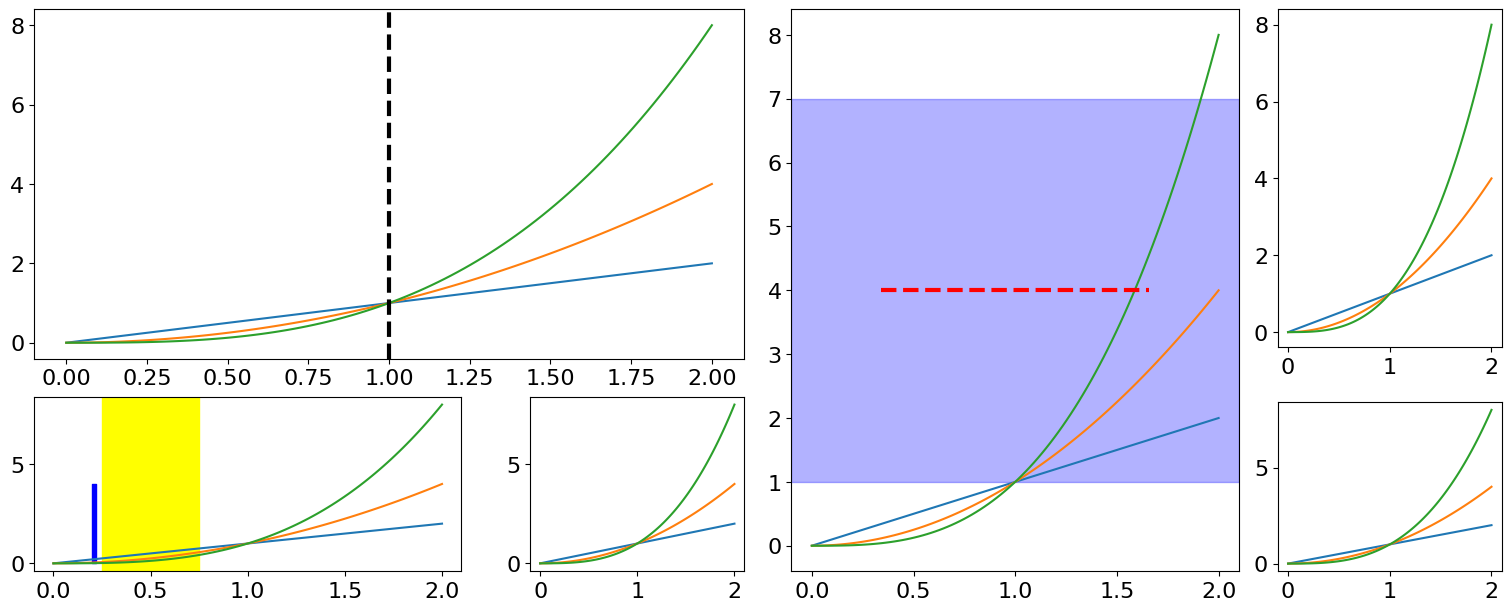

In [35]:
plotter2 = copy.deepcopy(plotter)
plotter2.clear_fig_legends()
plotter2.fig

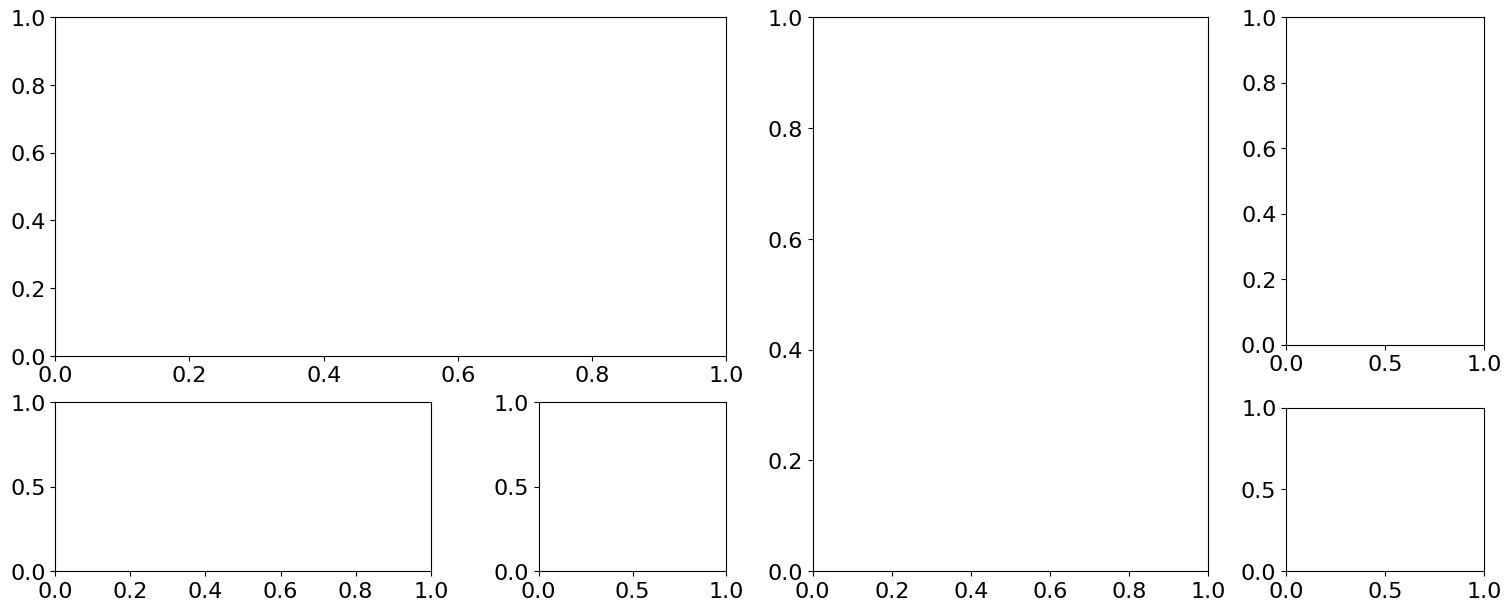

In [36]:
plotter3 = copy.deepcopy(plotter)
plotter3.clear_all_axes()
plotter3.fig